### - –°—É–¥—è –ø–æ –¥–∞–Ω–Ω—ã–º, –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ, –∫–∞–∫ –Ω–∞—Ä–∞—Å—Ç–∞–µ—Ç —Ä–µ–≤–µ–Ω—é –≤ –ø–µ—Ä–≤—ã–π –º–µ—Å—è—Ü –∂–∏–∑–Ω–∏ —É
### –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–≥—Ä—ã.
### - –í–æ —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ —É–≤–µ–ª–∏—á–∏—Ç—Å—è —Ä–µ–≤–µ–Ω—é –Ω—É–ª–µ–≤–æ–≥–æ –¥–Ω—è (–¥–µ–Ω—å —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏–≥—Ä—ã), –ø–µ—Ä–≤–æ–≥–æ –∏
 ### —Ç—Ä–µ—Ç—å–µ–≥–æ –¥–Ω—è –∫ 30-–º—É –¥–Ω—é?

### –ü–æ—è—Å–Ω–µ–Ω–∏–µ –∫ —Ç–∞–±–ª–∏—Üe:
–õ–∏—Å—Ç ad revenue (–¥–∞–Ω–Ω—ã–µ –ø–æ —Ä–µ–∫–ª–∞–º–Ω–æ–º—É –∑–∞—Ä–∞–±–æ—Ç–∫—É):
- Install_date - –¥–∞—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏–≥—Ä—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º
- Event_date - –¥–∞—Ç–∞ —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è
- Event_revenue - —Ä–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–∞–±–æ—Ç–æ–∫
- Platform - –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞
- User_id - —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è

–õ–∏—Å—Ç installs data (–¥–∞–Ω–Ω—ã–µ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∏–Ω—Å—Ç–∞–ª–ª–æ–≤)
- Install_date - –¥–∞—Ç–∞
- installs - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Å—Ç–∞–ª–ª–æ–≤
- Platform - –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
df_revenue = pd.read_excel('Ad_revenue.xlsx', sheet_name=0)
df_installs = pd.read_excel('Ad_revenue.xlsx', sheet_name=1)

## EDA

In [5]:
df_revenue.head()

install_date event_date  event_revenue platform  \
0   2023-09-21 2023-09-21       0.316470  android   
1   2023-09-21 2023-09-21       0.063103  android   
2   2023-09-21 2023-09-21       0.316470  android   
3   2023-09-21 2023-09-21       0.054710  android   
4   2023-09-21 2023-09-21       0.024880  android   

                             user_id  
0  1695339148585-8391306266630234966  
1  1695280270975-5411644856462553821  
2  1695317488398-8939481192662600393  
3  1695317488398-8939481192662600393  
4  1695280270975-5411644856462553821

In [6]:
df_installs.head()

install_date  installs platform
0   2023-09-21         1  android
1   2023-09-21         0  android
2   2023-09-21        47  android
3   2023-09-21         0  android
4   2023-09-21         0  android

–ü–æ—Å–º–æ—Ç—Ä—é –Ω–∞ —Ä–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤

In [8]:
revenue = df_revenue.shape[0]
installs = df_installs.shape[0]
print(f'''–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Ñ—Ä–µ–º–æ–≤: 
revenue : {revenue}
installs : {installs}''')

–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Ñ—Ä–µ–º–æ–≤: 
revenue : 78723
installs : 579


–ü—Ä–æ–≤–µ—Ä—é –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –¥–∞–Ω–Ω—ã—Ö

In [10]:
revenue = df_revenue.duplicated().sum()
installs = df_installs.duplicated().sum()
print(f'''–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö: 
revenue : {revenue}
installs : {installs}''')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö: 
revenue : 1209
installs : 361


–£–¥–∞–ª—é –¥—É–±–ª–∏–∫–∞—Ç—ã

In [12]:
df_revenue = df_revenue.drop_duplicates()
df_installs = df_installs.drop_duplicates()

In [13]:
df_revenue.describe(include='all')

install_date                     event_date  \
count                           77514                          77514   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2023-09-25 02:12:18.447248384  2023-09-26 10:28:00.315813888   
min               2023-09-21 00:00:00            2023-09-21 00:00:00   
25%               2023-09-24 00:00:00            2023-09-25 00:00:00   
50%               2023-09-25 00:00:00            2023-09-27 00:00:00   
75%               2023-09-27 00:00:00            2023-09-28 00:00:00   
max               2023-09-28 00:00:00            2023-09-30 00:00:00   
std                               NaN                            NaN   

        event_revenue platform                            user_id  
count    76767.000000    77514                              77514  
unique            NaN        2                               8018  
top               NaN  android  1695439890544-6516855507285663669  
freq              NaN    71181                                130  
mean         0.112389      NaN                                NaN  
min          0.000040      NaN                                NaN  
25%          0.025280      NaN                                NaN  
50%          0.052360      NaN                                NaN  
75%          0.121692      NaN                                NaN  
max          7.911244      NaN                                NaN  
std          0.194330      NaN                                NaN

In [14]:
df_installs.describe(include='all')

install_date    installs platform
count                             218  218.000000      218
unique                            NaN         NaN        2
top                               NaN         NaN  android
freq                              NaN         NaN      160
mean    2023-09-24 21:14:51.743119360   39.110092      NaN
min               2023-09-21 00:00:00    0.000000      NaN
25%               2023-09-23 00:00:00    3.000000      NaN
50%               2023-09-25 00:00:00    8.500000      NaN
75%               2023-09-27 00:00:00   47.750000      NaN
max               2023-09-28 00:00:00  371.000000      NaN
std                               NaN   67.566706      NaN

In [15]:
df_revenue.dtypes

install_date     datetime64[ns]
event_date       datetime64[ns]
event_revenue           float64
platform                 object
user_id                  object
dtype: object

In [16]:
df_installs.dtypes

install_date    datetime64[ns]
installs                 int64
platform                object
dtype: object

–ü–æ—Å–º–æ—Ç—Ä—é, –∫–∞–∫ –æ–±—â–∞—è –≤—ã—Ä—É—á–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –ø–æ –¥–Ω—è–º –ø–æ—Å—Ç—Ä–æ–∏–≤ –≥—Ä–∞—Ñ–∏–∫

In [18]:
sum = df_revenue.groupby('event_date', as_index = False)\
    .agg({'event_revenue': 'sum'})

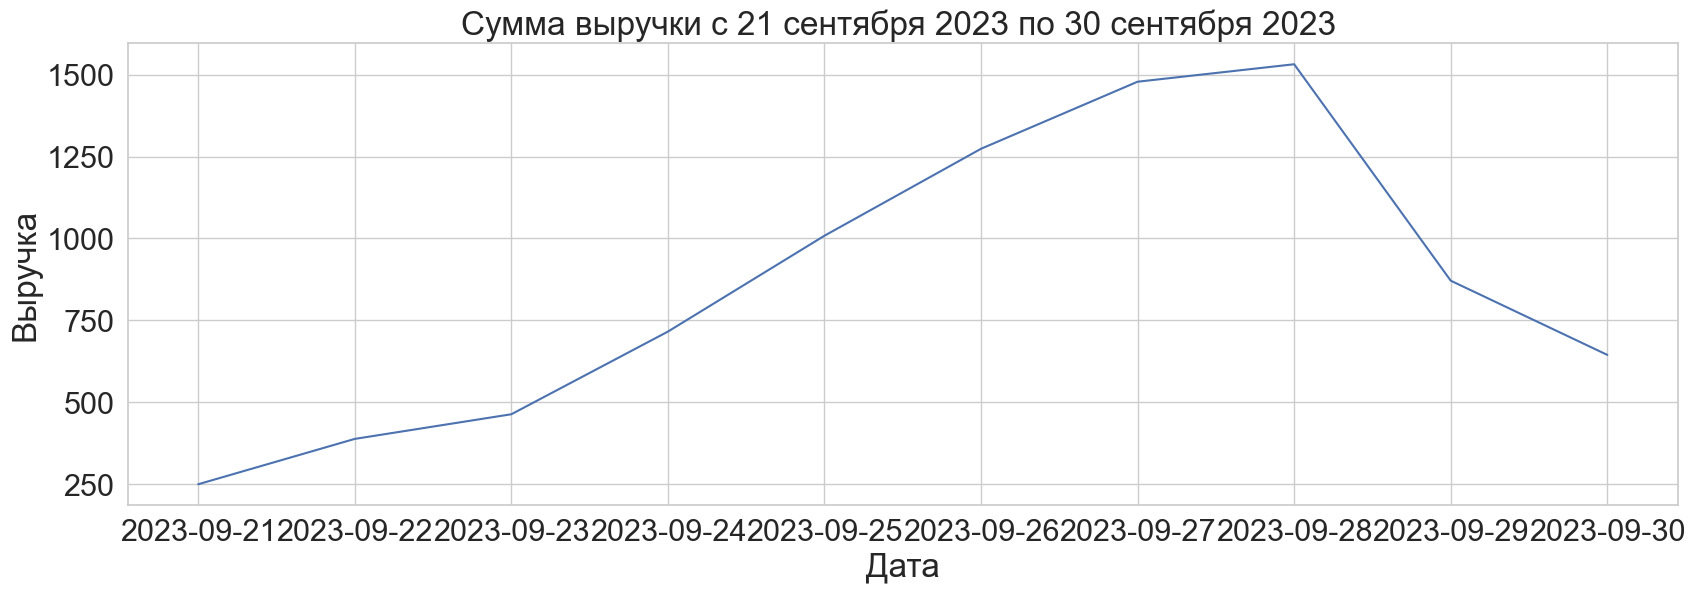

In [19]:
sns.set(
    font_scale =2,
    style = 'whitegrid',
    rc = {'figure.figsize' : (20,6)}
)
sns.lineplot(data = sum, x='event_date', y='event_revenue')
plt.title('–°—É–º–º–∞ –≤—ã—Ä—É—á–∫–∏ —Å 21 —Å–µ–Ω—Ç—è–±—Ä—è 2023 –ø–æ 30 —Å–µ–Ω—Ç—è–±—Ä—è 2023 ')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–í—ã—Ä—É—á–∫–∞')
plt.show()

Text(0, 0.5, '–ß–∞—Å—Ç–æ—Ç–∞')

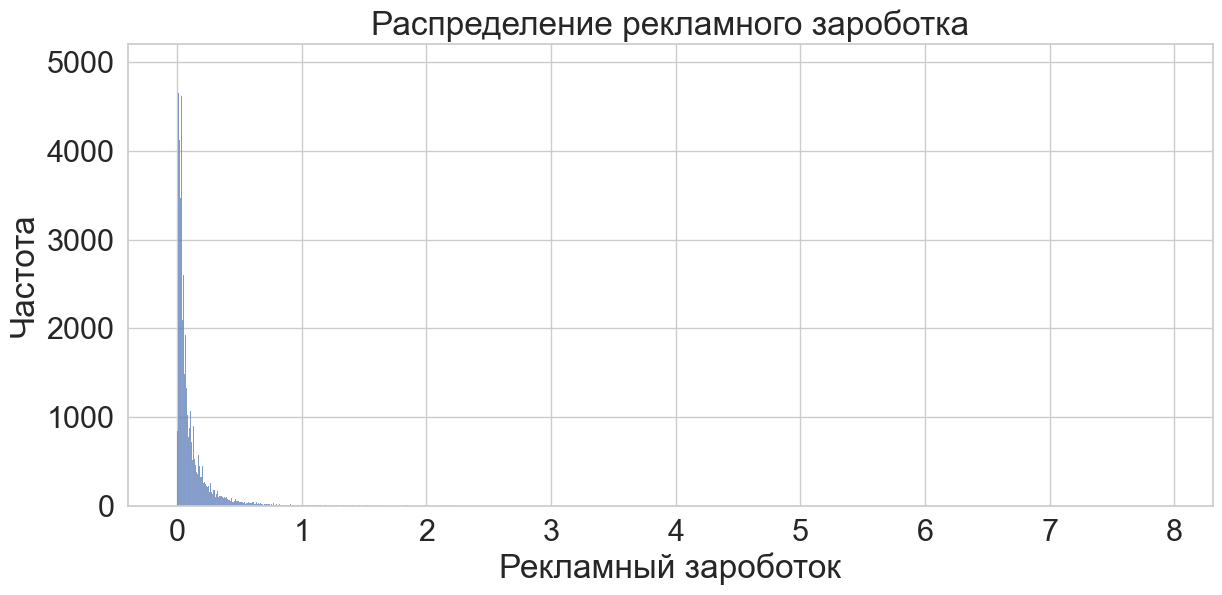

In [20]:
# –ü–æ—Å—Ç—Ä–æ—é –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–µ–∫–∞–º–Ω–æ–≥–æ –∑–∞—Ä–æ–±–æ—Ç–∫–∞
plt.figure(figsize=(14, 6))
sns.histplot(df_revenue.event_revenue, kde = False)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∑–∞—Ä–æ–±–æ—Ç–∫–∞')
plt.xlabel('–†–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–æ–±–æ—Ç–æ–∫')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')


–í–∏–∂—É, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã, –ø–æ—Å—Ç—Ä–æ—é –µ—â–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏

Text(0, 0.5, '–†–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–æ–±–æ—Ç–æ–∫')

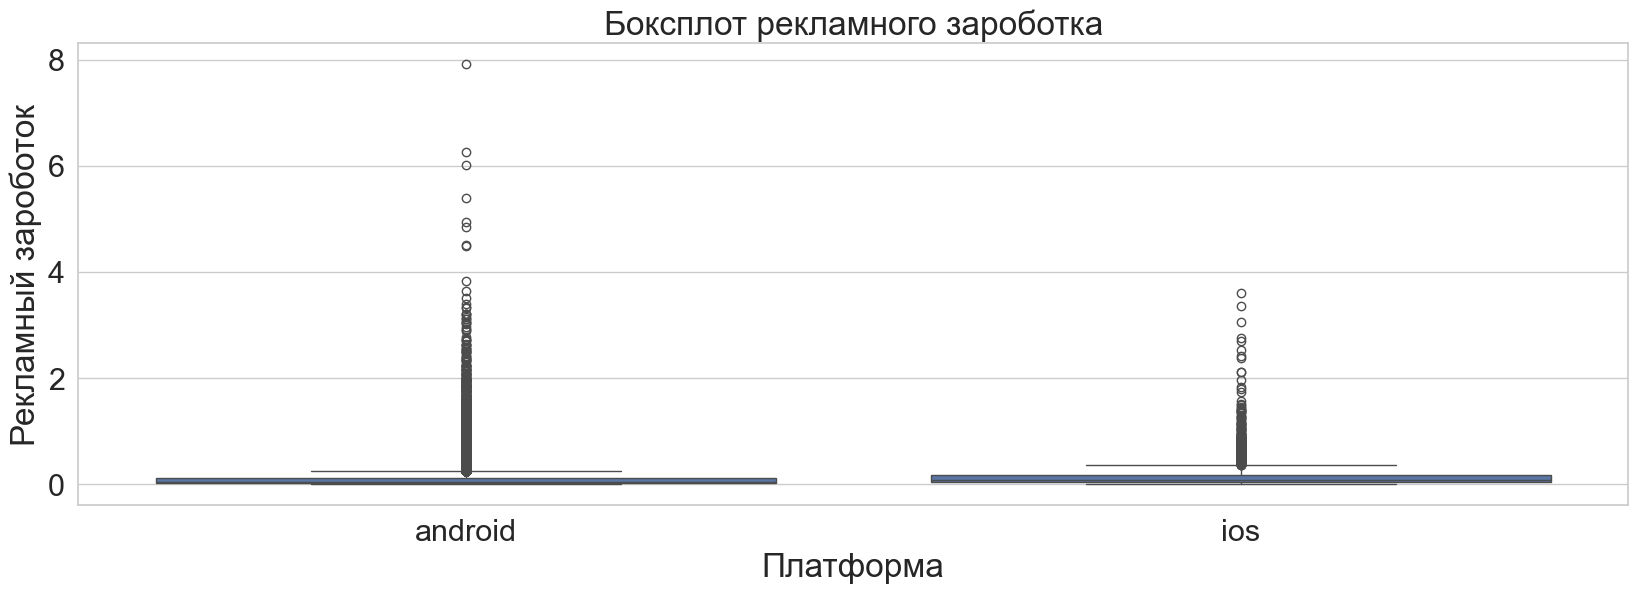

In [22]:
sns.boxplot(x='platform', y = 'event_revenue',data = df_revenue)
plt.title('–ë–æ–∫—Å–ø–ª–æ—Ç —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∑–∞—Ä–æ–±–æ—Ç–∫–∞')
plt.xlabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º–∞')
plt.ylabel('–†–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–æ–±–æ—Ç–æ–∫')

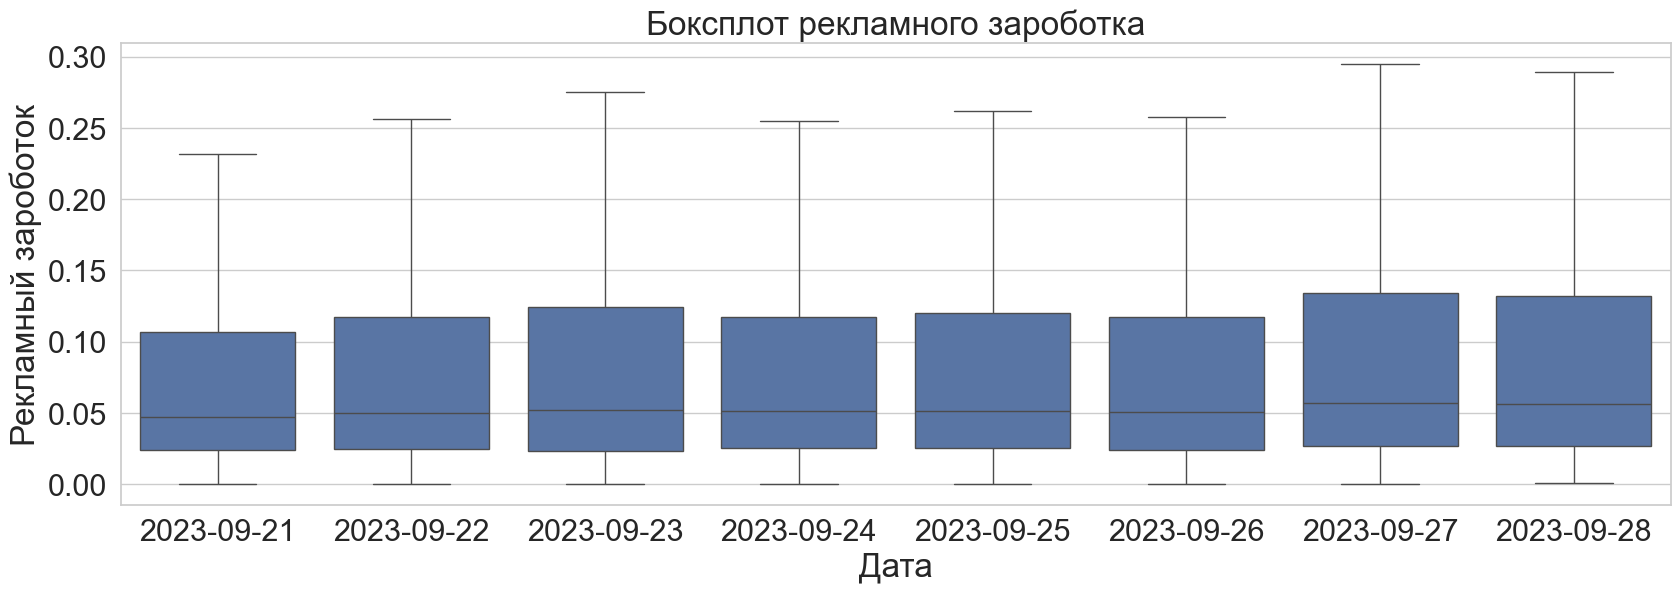

In [23]:
sns.boxplot(x='install_date', y='event_revenue', data=df_revenue, showfliers = False)
plt.title('–ë–æ–∫—Å–ø–ª–æ—Ç —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∑–∞—Ä–æ–±–æ—Ç–∫–∞')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–†–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–æ–±–æ—Ç–æ–∫')
plt.show()

In [24]:
meadian = df_revenue.event_revenue.median()
moda = df_revenue.event_revenue.mode()[0]
mean = df_revenue.event_revenue.mean()
quantile_1 = df_revenue.event_revenue.quantile(0.25)
quantile_3 = df_revenue.event_revenue.quantile(0.75)
print(f''' 
–ú–µ–¥–∏–∞–Ω–∞: {meadian}
–ú–æ–¥–∞: {moda}
–°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {mean}
1-–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å: {quantile_1}
3-–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å: {quantile_3} ''')

 
–ú–µ–¥–∏–∞–Ω–∞: 0.05236
–ú–æ–¥–∞: 0.03629
–°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 0.11238878938866964
1-–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å: 0.02528
3-–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å: 0.121692 


–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –≤–∏–∂—É: 
- 50 %  –¥–∞–Ω–Ω—ã—Ö —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–æ c 0.02528 –¥–æ 0.121692
- –º–µ–¥–∏–∞–Ω–∞ = 0.05236
- –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö: ùëÑ3 - ùëÑ1 = 0.121692 ‚àí 0.02528 = 0.096412

–û–ø—Ä–µ–¥–µ–ª–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤:

- –ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞: ùëÑ1 - 1.5 √ó ùêºùëÑùëÖ = 0.02528 ‚àí 1.5 √ó 0.096412 = - 0.119338
- –í–µ—Ä—Ö–Ω—è—è¬†–≥—Ä–∞–Ω–∏—Ü–∞: Q3 + 1.5 √ó IQR = 0.121692 + 1.5 √ó 0.096412 = 0.26631

–¢.–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–µ–≤—ã—â–∞—é—â–∏–µ 0.26631 –±—É–¥—É—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –≤—ã–±—Ä–æ—Å–∞–º–∏

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–Ω—è—Ç—å, —Å—Ç–æ–∏—Ç –ª–∏ —É–±–∏—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã, –¥–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å–æ–º—Ç—Ä—é –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤, —á—Ç–æ–±—ã –±–æ–ª—å—à–µ –ø–æ–Ω—è—Ç—å –∏—Ö –ø—Ä–∏—Ä–æ–¥—É. 

–ü–æ—Å–º–æ—Ç—Ä—é –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –¥–Ω—è–º –≤ —Ä–∞–∑—Ä–µ–∑–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º

In [27]:
# –°–æ–∑–¥–∞–º –æ—Ç–¥–µ–ª—å–Ω—ã–π df —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ 
emissions = df_revenue.query('event_revenue > 0.26631')\
    .groupby(['event_date','platform'], as_index = False)\
    .agg({'event_revenue':'sum'})

Text(0, 0.5, '–í—ã–±—Ä–æ—Å—ã')

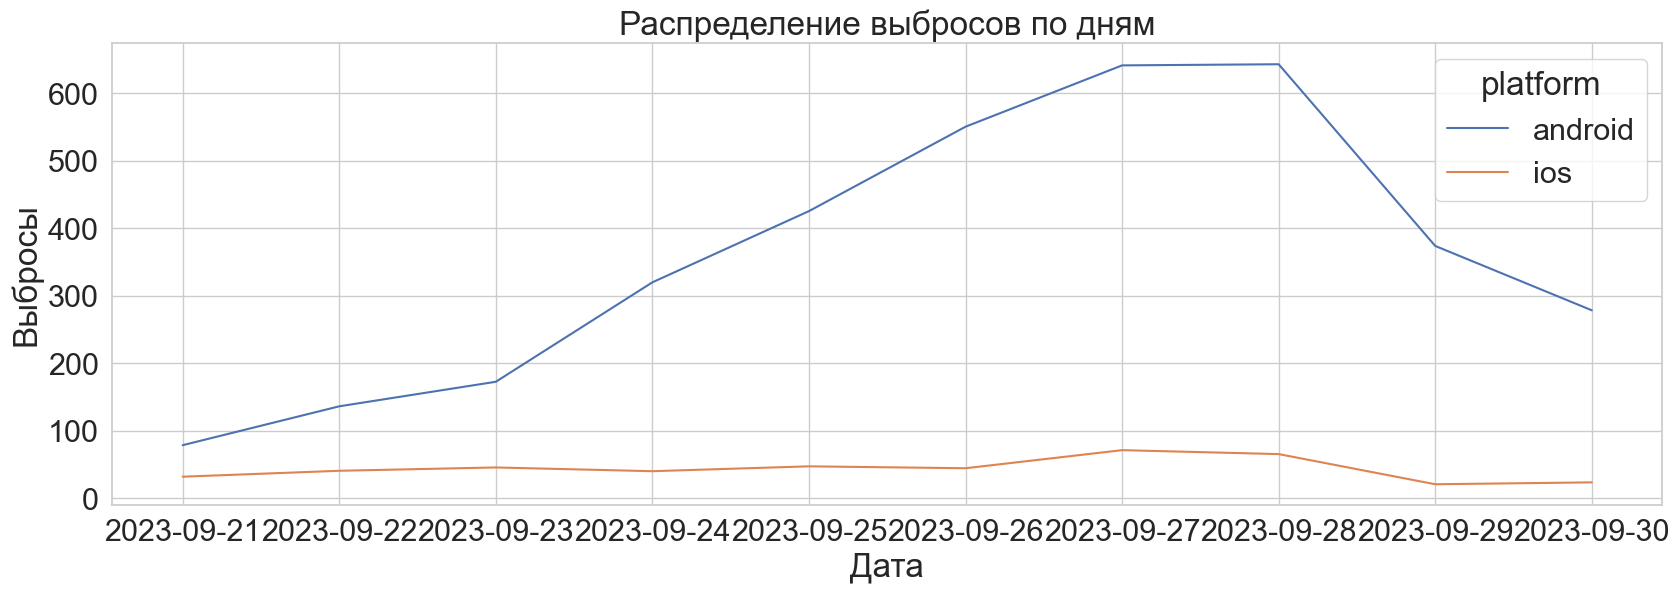

In [28]:
sns.lineplot(x = 'event_date', y = 'event_revenue', data = emissions ,hue = 'platform')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –¥–Ω—è–º')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–í—ã–±—Ä–æ—Å—ã')

In [29]:
# –°–æ–∑–¥–∞–º –æ—Ç–¥–µ–ª—å–Ω—ã–π df –±–µ–∑ –≤—ã–±—Ä–∞—Å–æ–≤
no_emissions = df_revenue.query('event_revenue < 0.26631')\
    .groupby(['event_date','platform'], as_index = False)\
    .agg({'event_revenue':'sum'})

Text(0, 0.5, '–†–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–∞–±–æ—Ç–æ–∫ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤')

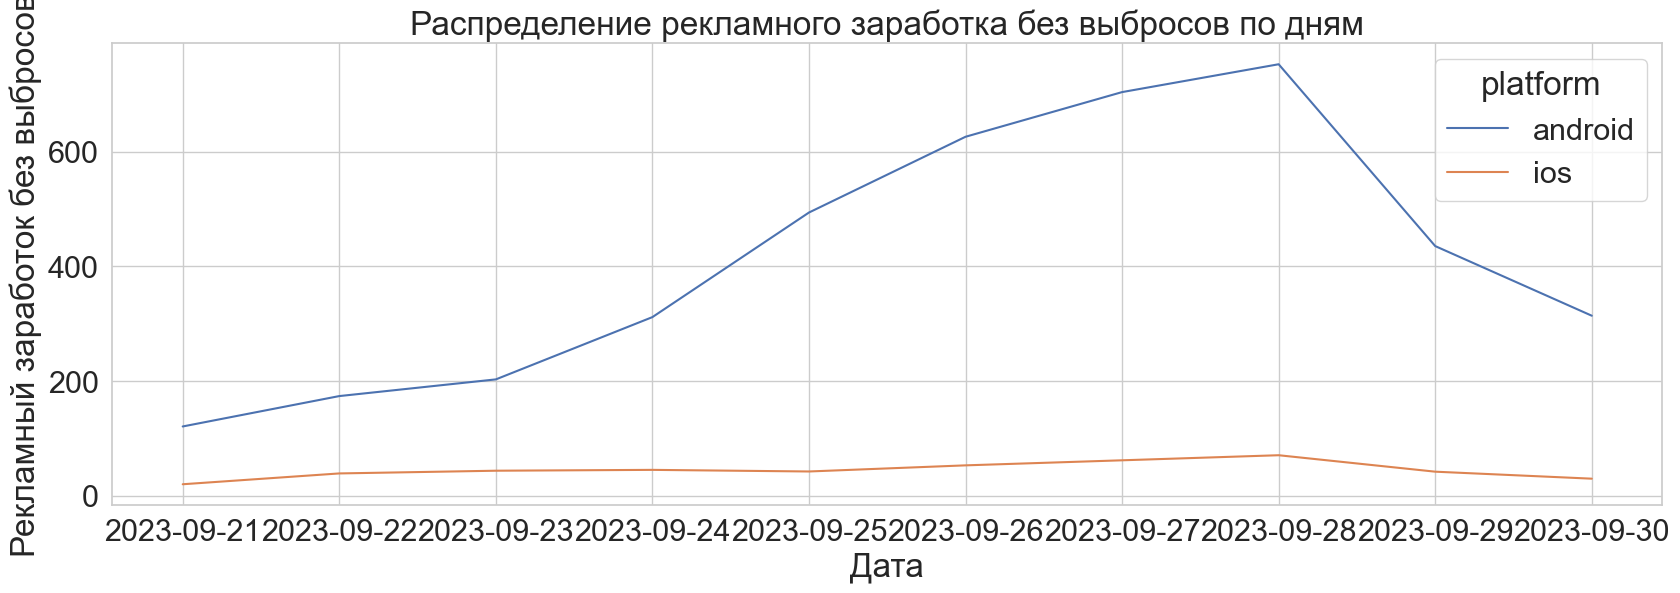

In [30]:
sns.lineplot(x = 'event_date', y = 'event_revenue', data = no_emissions, hue= 'platform')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∑–∞—Ä–∞–±–æ—Ç–∫–∞ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –¥–Ω—è–º')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–†–µ–∫–ª–∞–º–Ω—ã–π –∑–∞—Ä–∞–±–æ—Ç–æ–∫ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤')

## –ö–∞–∫ –Ω–∞—Ä–∞—Å—Ç–∞–µ—Ç —Ä–µ–≤–µ–Ω—é –≤ –ø–µ—Ä–≤—ã–π –º–µ—Å—è—Ü –∂–∏–∑–Ω–∏ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–≥—Ä—ã.

In [32]:
# –°–æ–∑–¥–∞–º —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–ª–∏—á–µ—Ç—Å–≤–æ–º –¥–Ω–µ–π —Å –º–æ–º–µ–Ω—Ç–∞ —É—Å—Ç–∞–Ω–æ–≤–∫–∏
df_revenue['days_since_install'] = (df_revenue.event_date - df_revenue.install_date).dt.days

In [33]:
df_revenue.head()

install_date event_date  event_revenue platform  \
0   2023-09-21 2023-09-21       0.316470  android   
1   2023-09-21 2023-09-21       0.063103  android   
2   2023-09-21 2023-09-21       0.316470  android   
3   2023-09-21 2023-09-21       0.054710  android   
4   2023-09-21 2023-09-21       0.024880  android   

                             user_id  days_since_install  
0  1695339148585-8391306266630234966                   0  
1  1695280270975-5411644856462553821                   0  
2  1695317488398-8939481192662600393                   0  
3  1695317488398-8939481192662600393                   0  
4  1695280270975-5411644856462553821                   0

In [34]:
# –ü–æ—Å—á–∏—Ç–∞—é –æ–±—â—É—é —Å—É–º–º—É –¥–æ—Ö–æ–¥–∞ –ø–æ –¥–∞—Ç–µ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –∏ –ø–æ –¥–Ω—è–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è
revenue_by_day = df_revenue.groupby(['install_date', 'days_since_install'])\
    .agg(total_revenue=('event_revenue', 'sum')).reset_index()

In [35]:
# –û—Ç–æ–±—Ä–∞–∂—É –æ–±—â—É—é —Å—É–º–º—É –¥–æ—Ö–æ–¥–∞ –≤—Ç–∞–±–ª–∏—á–Ω–æ–º –≤–∏–¥–µ
revenue_summary = revenue_by_day.pivot(index='install_date', columns='days_since_install', values='total_revenue')
revenue_summary

days_since_install           0           1           2           3  \
install_date                                                         
2023-09-21          250.690207   90.050838   55.957738   40.644282   
2023-09-22          298.912279  102.907600   51.317583   38.088258   
2023-09-23          305.251365  144.563393   71.718568   57.431749   
2023-09-24          479.590360  176.026499  115.864641   80.173004   
2023-09-25          689.403892  280.798198  158.380607  146.781009   
2023-09-26          754.378128  333.214173  180.165210  164.773894   
2023-09-27          807.189422  330.604241  205.136479  142.328066   
2023-09-28          726.973149  291.834933  172.412495         NaN   

days_since_install           4          5          6          7          8  \
install_date                                                                 
2023-09-21           33.224541  24.452859  21.983467  15.526360  15.473379   
2023-09-22           40.661297  30.507611  22.090939  20.164325  27.931508   
2023-09-23           46.594525  40.390391  38.205923  34.282606        NaN   
2023-09-24           68.749947  43.248005  41.922670        NaN        NaN   
2023-09-25           92.538496  78.492313        NaN        NaN        NaN   
2023-09-26          134.228859        NaN        NaN        NaN        NaN   
2023-09-27                 NaN        NaN        NaN        NaN        NaN   
2023-09-28                 NaN        NaN        NaN        NaN        NaN   

days_since_install          9  
install_date                   
2023-09-21          13.517914  
2023-09-22                NaN  
2023-09-23                NaN  
2023-09-24                NaN  
2023-09-25                NaN  
2023-09-26                NaN  
2023-09-27                NaN  
2023-09-28                NaN

–ü–æ—Å–æ–º—Ç—Ä—é, –∫–∞–∫ –¥–æ—Ö–æ–¥ –æ—Ç —Ä–µ–∫–ª–∞–º—ã (Event_revenue) –Ω–∞–∫–∞–ø–ª–∏–≤–∞–µ—Ç—Å—è –ø–æ –¥–Ω—è–º

In [37]:
data = df_revenue.groupby(['days_since_install']).agg(total_revenue=('event_revenue', 'sum')).reset_index()
data

days_since_install  total_revenue
0                   0    4312.388802
1                   1    1749.999875
2                   2    1010.953321
3                   3     670.220262
4                   4     415.997665
5                   5     217.091179
6                   6     124.202999
7                   7      69.973291
8                   8      43.404887
9                   9      13.517914

In [38]:
# –î–æ–±–∞–≤–ª—é —Å—Ç–æ–ª–±–µ—Ü –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã–º –¥–æ—Ö–æ–¥–æ–º
data['cumulative_revenue'] = data['total_revenue'].cumsum()
data

days_since_install  total_revenue  cumulative_revenue
0                   0    4312.388802         4312.388802
1                   1    1749.999875         6062.388677
2                   2    1010.953321         7073.341998
3                   3     670.220262         7743.562260
4                   4     415.997665         8159.559925
5                   5     217.091179         8376.651104
6                   6     124.202999         8500.854103
7                   7      69.973291         8570.827394
8                   8      43.404887         8614.232281
9                   9      13.517914         8627.750195

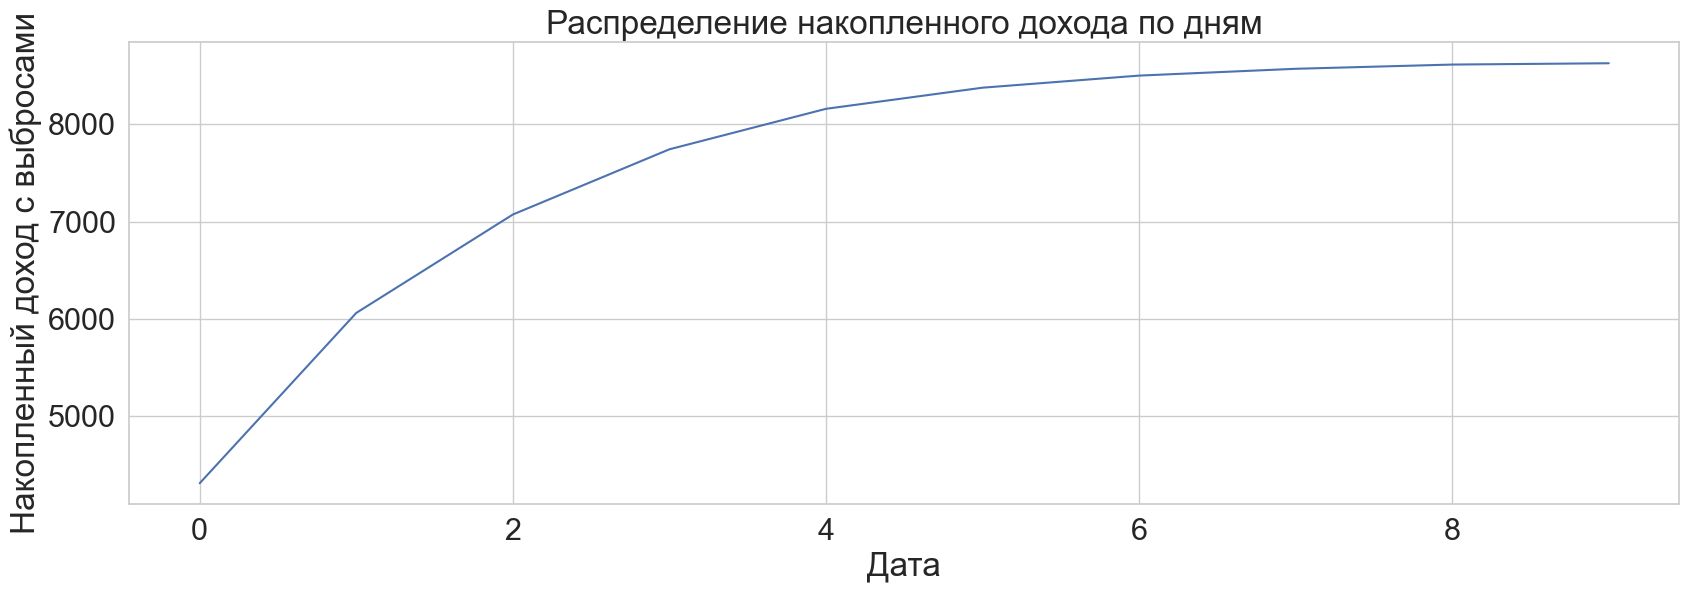

In [39]:
# –ü–æ—Å—Ç—Ä–æ—é –≥—Ä–∞—Ñ–∏–∫ –ø–æ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–º—É –¥–æ—Ö–æ–¥—É
sns.lineplot(x = 'days_since_install', y = 'cumulative_revenue', data = data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–≥–æ –¥–æ—Ö–æ–¥–∞ –ø–æ –¥–Ω—è–º')
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω—ã–π –¥–æ—Ö–æ–¥ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏')
plt.show()


### –í–´–í–û–î:
–°—É–¥—è –ø–æ –¥–∞–Ω–Ω—ã–º –∏ –≥—Ä–∞—Ñ–∏–∫—É, –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤ –ø–µ—Ä–≤—ã–µ –¥–Ω–∏ –ø–æ—Å–ª–µ —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏–≥—Ä—ã –¥–æ—Ö–æ–¥ –Ω–∞—Ä–∞—Å—Ç–∞–µ—Ç –¥–æ–≤–æ–ª—å–Ω–æ –±—ã—Å—Ç—Ä–æ, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –ø–µ—Ä–≤—ã–µ —Ç—Ä–∏ –¥–Ω—è, –∫–æ–≥–¥–∞ —Ä–æ—Å—Ç –¥–æ—Ö–æ–¥–∞ –∑–∞–º–µ—Ç–Ω–æ –≤—ã—à–µ. 

–ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ —Ç–µ–º–ø —É–≤–µ–ª–∏—á–µ–Ω–∏—è –¥–æ—Ö–æ–¥–∞ –∑–∞–º–µ–¥–ª—è–µ—Ç—Å—è, –∏ –Ω–∞—á–∏–Ω–∞—è –ø—Ä–∏–º–µ—Ä–Ω–æ —Å 6-–≥–æ –¥–Ω—è, –∫—Ä–∏–≤–∞—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è. 

–≠—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª—å—à–∏–π –¥–æ—Ö–æ–¥ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–≥—Ä—ã –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è –≤ –ø–µ—Ä–≤—ã–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π, –ø–æ—Å–ª–µ —á–µ–≥–æ –ø—Ä–∏—Ä–æ—Å—Ç –¥–æ—Ö–æ–¥–∞ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è.
–ì—Ä–∞—Ñ–∏–∫ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é –º–æ–¥–µ–ª—å.

## –í–æ —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ —É–≤–µ–ª–∏—á–∏—Ç—Å—è —Ä–µ–≤–µ–Ω—é –Ω—É–ª–µ–≤–æ–≥–æ –¥–Ω—è (–¥–µ–Ω—å —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏–≥—Ä—ã), –ø–µ—Ä–≤–æ–≥–æ –∏ —Ç—Ä–µ—Ç—å–µ–≥–æ –¥–Ω—è –∫ 30-–º—É –¥–Ω—é?

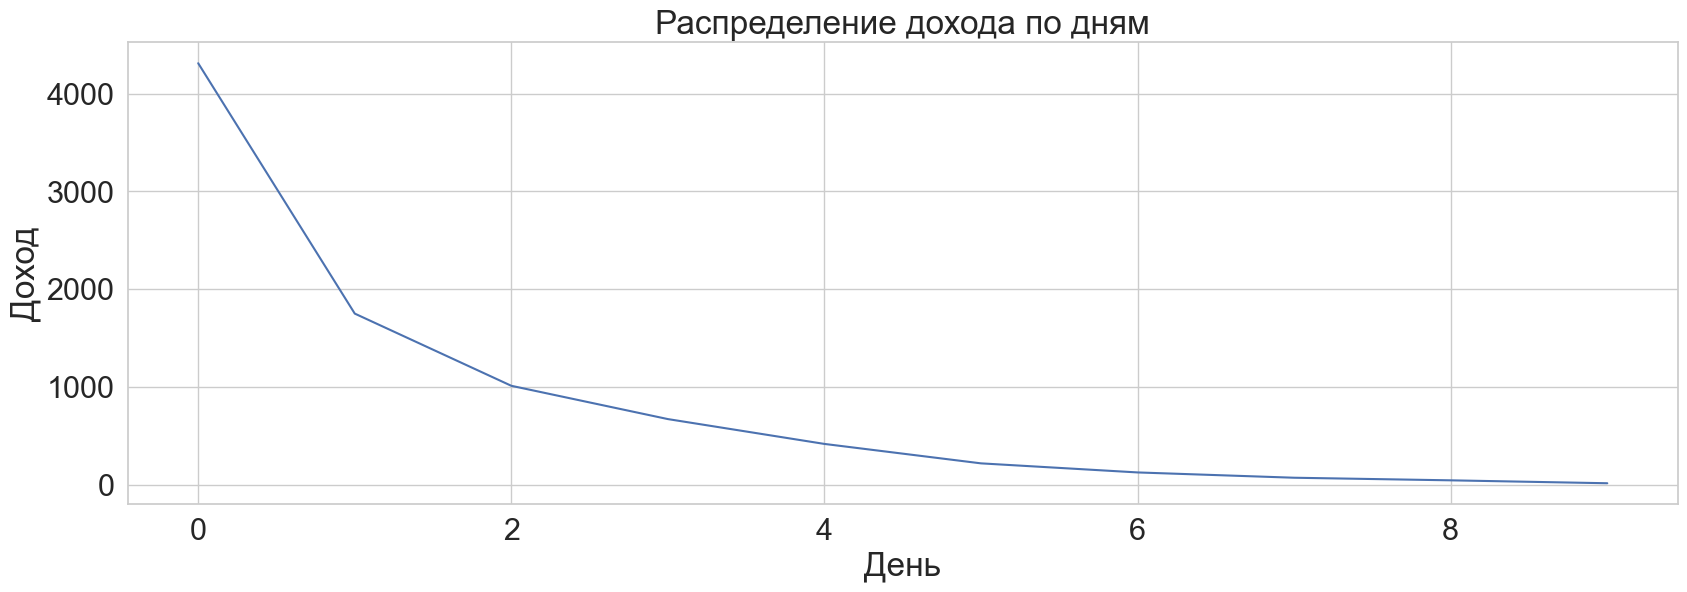

In [42]:
# –ü–æ—Å—Ç—Ä–æ—é –≥—Ä–∞—Ñ–∏–∫, —á—Ç–æ–±—ã –ø–æ—Å–æ–º—Ç—Ä–µ—Ç—å, –∫–∞–∫ —É–≤–µ–ª–∏—á–∏–≤–∞–ª—Å—è –¥–æ—Ö–æ–¥ –¥–æ 9 –¥–Ω—è
sns.lineplot(x = 'days_since_install', y = 'total_revenue', data = data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ—Ö–æ–¥–∞ –ø–æ –¥–Ω—è–º')
plt.xlabel('–î–µ–Ω—å')
plt.ylabel('–î–æ—Ö–æ–¥')

plt.show()

–í–∏–∂—É, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ, –ø–æ—ç—Ç–æ–º—É –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

–î–ª—è –º–æ–¥–µ–ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ë–ï–ó –≤—ã–±—Ä–æ—Å–æ–≤. 

In [44]:
# –°–æ—Ö—Ä–∞–Ω—é –¥–∞–Ω–Ω—ã–µ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π df –∏ –ø–æ—Å—á–∏—Ç–∞—é –≤—ã—Ä—É—á–∫—É –ø–æ –¥–Ω—è–º 
without_emissions = df_revenue.query('event_revenue < 0.26631')\
    .groupby(['days_since_install'], as_index = False)\
    .agg(total_revenue=('event_revenue', 'sum'))
without_emissions

days_since_install  total_revenue
0                   0    2264.570228
1                   1     896.805334
2                   2     543.388500
3                   3     358.971784
4                   4     234.489126
5                   5     135.748933
6                   6      72.372485
7                   7      41.308510
8                   8      21.266805
9                   9       9.824786

In [45]:
days = without_emissions['days_since_install']
revenue = without_emissions['total_revenue']

In [46]:
# –û–ø—Ä–µ–¥–µ–ª—é —Ñ—É–Ω–∫—Ü–∏—é —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –¥–µ–Ω—å (day) –∏ –¥–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ (a, b) –¥–ª—è –º–æ–¥–µ–ª–∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–æ—Å—Ç–∞.
def exponential_growth(day, a, b):
    return a * np.exp(b * day)

In [47]:
# –ò—Å–ø–æ–ª—å–∑—É—é —Ñ—É–Ω–∫—Ü–∏—é curve_fit –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (a, b)–¥–ª—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏.
# –ú–æ–¥–µ–ª—å –ø–æ–¥–≥–æ–Ω—è–µ—Ç—Å—è –ø–æ–¥ —Ä–µ–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (days –∏ revenue).
# maxfev=10000 –∑–∞–¥–∞–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è –ø–æ–∏—Å–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
params, _ = curve_fit(exponential_growth, days, revenue, maxfev=10000)

In [48]:
# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è –º–∞—Å—Å–∏–≤ —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –¥–Ω—è–º–∏ —Å 0 –ø–æ 30 –¥–µ–Ω—å
predicted_days = np.arange(0, 31)

In [49]:
# –ò—Å–ø–æ–ª—å–∑—É—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é curve_fit, –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –¥–æ—Ö–æ–¥–æ–≤ –Ω–∞ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å –æ—Ç 0 –¥–æ 30.
predicted_revenue = exponential_growth(predicted_days, *params)

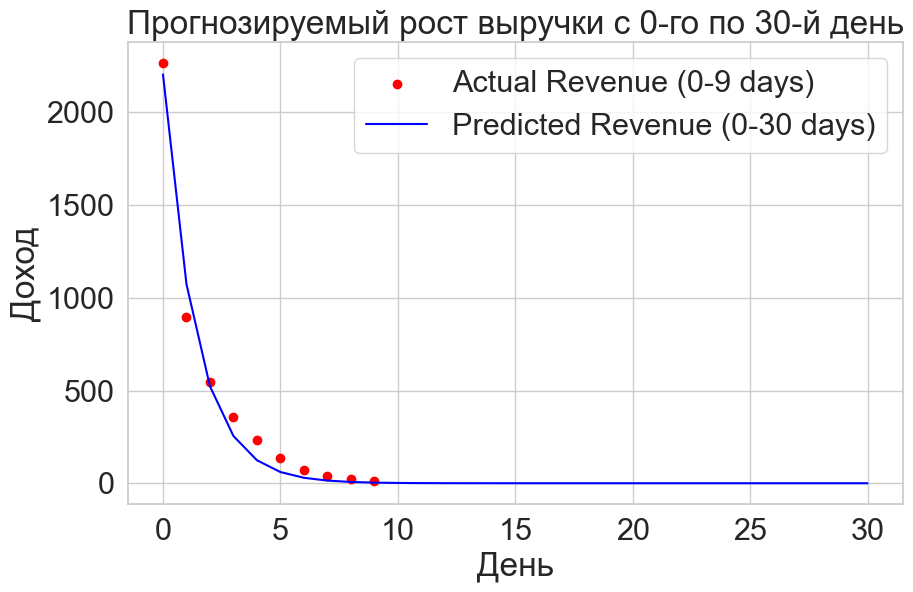

In [50]:
# –°–æ–∑–¥–∞—é –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 6))
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–æ—á–µ—á–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã –¥–ª—è —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–¥–æ—Ö–æ–¥ —Å 0 –ø–æ 9 –¥–µ–Ω—å)
plt.scatter(days, revenue, color='red', label='Actual Revenue (0-9 days)')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ª–∏–Ω–∏–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø–µ—Ä–∏–æ–¥ —Å 0 –ø–æ 30 –¥–µ–Ω—å
plt.plot(predicted_days, predicted_revenue, label='Predicted Revenue (0-30 days)', color='blue')
plt.xlabel('–î–µ–Ω—å')
plt.ylabel('–î–æ—Ö–æ–¥')
plt.title('–ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º—ã–π —Ä–æ—Å—Ç –≤—ã—Ä—É—á–∫–∏ —Å 0-–≥–æ –ø–æ 30-–π –¥–µ–Ω—å')
plt.legend()
plt.grid(True) # —Å–µ—Ç–∫–∞
plt.show()


In [51]:
day_30_pred = predicted_revenue[30]
print (f''' –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –¥–æ—Ö–æ–¥ –∑–∞ 30 –¥–µ–Ω—å: {day_30_pred} ''')

 –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –¥–æ—Ö–æ–¥ –∑–∞ 30 –¥–µ–Ω—å: 9.347055844081926e-07 


In [52]:
data

days_since_install  total_revenue  cumulative_revenue
0                   0    4312.388802         4312.388802
1                   1    1749.999875         6062.388677
2                   2    1010.953321         7073.341998
3                   3     670.220262         7743.562260
4                   4     415.997665         8159.559925
5                   5     217.091179         8376.651104
6                   6     124.202999         8500.854103
7                   7      69.973291         8570.827394
8                   8      43.404887         8614.232281
9                   9      13.517914         8627.750195

In [53]:
# –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–π –≤—ã—Ä—É—á–∫–∏ –∫ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–æ–π –≤—ã—Ä—É—á–∫–µ –∑–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –¥–µ–Ω—å 
day_0_to_30 =  data.loc[data['days_since_install']== 0,'total_revenue'].iloc[0] / day_30_pred
day_1_to_30 = data.loc[data['days_since_install']== 1,'total_revenue'].iloc[0] / day_30_pred
day_3_to_30 = data.loc[data['days_since_install']== 3,'total_revenue'].iloc[0] / day_30_pred
print("–î–æ—Ö–æ–¥ –∑–∞ 0 –¥–µ–Ω—å –±–æ–ª—å—à–µ –≤:", day_0_to_30, "–ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ 30-–º—É –¥–Ω—é ")
print("–î–æ—Ö–æ–¥ –∑–∞ –ø–µ—Ä–≤—ã–π –¥–µ–Ω—å –±–æ–ª—å—à–µ –≤:", day_1_to_30, "–ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ 30-–º—É –¥–Ω—é ")
print("–î–æ—Ö–æ–¥ –∑–∞ —Ç—Ä–µ—Ç–∏–π –¥–µ–Ω—å –±–æ–ª—å—à–µ –≤:", day_3_to_30,  "–ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ 30-–º—É –¥–Ω—é ")

–î–æ—Ö–æ–¥ –∑–∞ 0 –¥–µ–Ω—å –±–æ–ª—å—à–µ –≤: 4613633291.525034 –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ 30-–º—É –¥–Ω—é 
–î–æ—Ö–æ–¥ –∑–∞ –ø–µ—Ä–≤—ã–π –¥–µ–Ω—å –±–æ–ª—å—à–µ –≤: 1872247159.0966363 –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ 30-–º—É –¥–Ω—é 
–î–æ—Ö–æ–¥ –∑–∞ —Ç—Ä–µ—Ç–∏–π –¥–µ–Ω—å –±–æ–ª—å—à–µ –≤: 717038897.7876375 –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ 30-–º—É –¥–Ω—é 


# –ó–∞–¥–∞–Ω–∏–µ 2
### –ö–∞–∫ –≤—ã –¥—É–º–∞–µ—Ç–µ, –∫–∞–∫–∏–µ –ø—Ä–æ–µ–∫—Ç—ã —è–≤–ª—è—é—Ç—Å—è –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞–º–∏?
### https://play.google.com/store/apps/details?id=com.matryoshka.cityrescueteam
### –ü–æ—á–µ–º—É?

–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–Ω–∫—É—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–æ–µ–∫—Ç–æ–≤, –±—É–¥—É –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ä—è–¥ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏:
1. –ñ–∞–Ω—Ä –∏–≥—Ä—ã
2. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∫–∞—á–∏–≤–∞–Ω–∏–π 
3. –†–µ–π—Ç–∏–Ω–≥ –∏–≥—Ä—ã

–ù–æ —Ç–∞–∫ –∂–µ –º–æ–∂–µ—Ç –≤–æ–∑–Ω–∏–∫–Ω—É—Ç—å —Å–∏—Ç—É–∞—Ü–∏–∏, —á—Ç–æ —Å–∫–∞—á–∏–≤–∞–Ω–∏–π –µ—â–µ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ –ø–æ—Ç–æ–º—É —á—Ç–æ –∏–≥—Ä–∞ —Ç–æ–ª—å–∫–æ –≤—ã—à–ª–∞, –Ω–æ —É–∂–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã—Å—Ç—Ä–æ —Ä–∞—Å—Ç–µ—Ç –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —Å—Ä–µ–¥–∏ –ø–æ–ª—å–∑–æ–≤—Ç–∞–ª–µ–π.
–ü–æ—ç—Ç–æ–º—É —Ç–∞–∫ –∂–µ –≤–∞–∂–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –¥–∏–Ω–∞–º–∏–∫—É —Å–∫–∞—á–∏–≤–∞–Ω–∏–π –∏–≥—Ä—ã

–ü—Ä–æ–≤–µ–¥—É –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑, –ø–æ –ø–æ–∏—Å–∫—É –æ—Å–Ω–æ–≤–Ω—ã—Ö –∫–æ–Ω–∫—É—Ä–µ—Ç–æ–≤ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ Android –∏ iOS

In [56]:
import pandas as pd
import itunespy
from google_play_scraper import app, search

–ù–∞–ø–∏—à—É –¥–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è—Ö –ø–æ –∫–ª—é—á–µ–≤–æ–º—É —Å–ª–æ–≤—É –¥–ª—è GooglePlay –∏ AppStore.


In [58]:
def get_game_GooglePlay (name_game, n_hits):
    '''
–§—É–Ω–∫—Ü–∏—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç –ø–æ–∏—Å–∫ –∏ —Å–±–æ—Ä –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ–± –∏–≥—Ä–∞—Ö –≤ Google Play –Ω–∞ –æ—Å–Ω–æ–≤–µ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è –∏–≥—Ä—ã –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
- name_game (str): –ù–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä—ã –∏–ª–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –ø–æ–∏—Å–∫–∞.
- n_hits (int): –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å.

–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
- df_GooglePlay: DataFrame, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∏–≥—Ä–∞—Ö, –≤–∫–ª—é—á–∞—è –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –Ω–∞–∑–≤–∞–Ω–∏–µ, –∫–æ–º–ø–∞–Ω–∏—é, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—Å—Ç–∞–Ω–æ–≤–æ–∫, —Ä–µ–π—Ç–∏–Ω–≥, –∂–∞–Ω—Ä –∏ –¥—Ä—É–≥–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã.
'''

    all_data = []
    results = search(name_game, n_hits)  # –ò—â–µ–º –ø–µ—Ä–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç—ã –ø–æ –∫–ª—é—á–µ–≤–æ–º—É —Å–ª–æ–≤—É name_game

    # –î–ª—è –∫–∞–∂–¥–æ–π –Ω–∞–π–¥–µ–Ω–Ω–æ–π –∏–≥—Ä—ã –ø–æ–ª—É—á–∞–µ–º –¥–µ—Ç–∞–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
    for result in results:
        app_id = result['appId']  # –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è —Å –ø–æ–º–æ—â—å—é —É–Ω–∏–∫–∞–ª—å–Ω–æ–≥–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
        
        # –ü–æ–ª—É—á–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏
        details = app(app_id)
        
        # –ò–∑–≤–ª–µ–∫–∞–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–æ–ª—è
        data = {
            'id': details.get('appId', 'N/A'), # –£–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è
            'name': details.get('title', 'N/A'), # –ù–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä—ã
            'company': details.get('developer', 'N/A'),  # –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä—ã
            'installs': details.get('installs', 'N/A'), # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—Å—Ç–∞–Ω–æ–≤–æ–∫
            'platform': "Android",  # –ü–ª–∞—Ç—Ñ–æ—Ä–º–∞ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è
            'reviews': details.get('ratings', 'N/A'), # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
            'genres': details.get('genre', 'N/A'), # –ñ–∞–Ω—Ä –∏–≥—Ä—ã
            'age': details.get('contentRating', 'N/A'), # –í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Ä–µ–π—Ç–∏–Ω–≥
            'price': details.get('price', 'N/A'), # –¶–µ–Ω–∞ –∏–≥—Ä—ã
            'release' : details.get('release_date', 'N/A'), # –î–∞—Ç–∞ —Ä–µ–ª–∏–∑–∞ –∏–≥—Ä—ã
            'score' : details.get('score', 'N/A') # –†–µ–π—Ç–∏–Ω–≥ –∏–≥—Ä—ã
        }
    
        # –î–æ–±–∞–≤–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –æ–± –∏–≥—Ä–µ –≤ —Å–ø–∏—Å–æ–∫
        all_data.append(data)
    
    # –°–æ–∑–¥–∞–µ–º DataFrame –∏–∑ —Å–ø–∏—Å–∫–∞
    df_GooglePlay = pd.DataFrame(all_data)
    return df_GooglePlay

In [59]:
def get_game_AppStore(name, limit,country, media):
    '''
–§—É–Ω–∫—Ü–∏—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç –ø–æ–∏—Å–∫ –∏ —Å–±–æ—Ä –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ–± –∏–≥—Ä–∞—Ö –≤ App Store –Ω–∞ –æ—Å–Ω–æ–≤–µ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è, —Å—Ç—Ä–∞–Ω—ã, —Ç–∏–ø–∞ –º–µ–¥–∏–∞ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
- name (str): –ù–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä—ã –∏–ª–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –ø–æ–∏—Å–∫–∞.
- limit (int): –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å.
- country (str): –ö–æ–¥ —Å—Ç—Ä–∞–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, 'us' –¥–ª—è –°–®–ê), –≤ –∫–æ—Ç–æ—Ä–æ–π –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –ø–æ–∏—Å–∫.
- media (str): –¢–∏–ø –º–µ–¥–∏–∞ –¥–ª—è –ø–æ–∏—Å–∫–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 'software' –¥–ª—è –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π).

–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
- df_AppStor (DataFrame): DataFrame, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∏–≥—Ä–∞—Ö, –≤–∫–ª—é—á–∞—è –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –Ω–∞–∑–≤–∞–Ω–∏–µ, —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∞, –ø–ª–∞—Ç—Ñ–æ—Ä–º—É, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –∂–∞–Ω—Ä, –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Ä–µ–π—Ç–∏–Ω–≥, —Ü–µ–Ω—É, –¥–∞—Ç—É —Ä–µ–ª–∏–∑–∞ –∏ –æ—Ü–µ–Ω–∫—É –∏–≥—Ä—ã. –î–∞–Ω–Ω—ã–µ –æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —É—Å—Ç–∞–Ω–æ–≤–æ–∫ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, —Ç–∞–∫ –∫–∞–∫ App Store –Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç —ç—Ç—É –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.
'''

# –°–æ–∑–¥–∞–µ–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
    all_data = []
    results = itunespy.search(name, country=country, media=media, limit=limit)
    # –ò–∑–≤–ª–µ–∫–∞–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–∞–∂–¥–æ–π –Ω–∞–π–¥–µ–Ω–Ω–æ–π –∏–≥—Ä–µ
    for result in results:
        all_data.append({
                'id': result.track_id, # –£–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è
                'name': result.track_name, # –ù–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä—ã
                'company': result.seller_name, # –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä—ã
                'installs': 'N/A',  # App Store –Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –¥–∞–Ω–Ω—ã–µ –æ–± —É—Å—Ç–∞–Ω–æ–≤–∫–∞—Ö
                'platform': 'iOS',  # –ü–ª–∞—Ç—Ñ–æ—Ä–º–∞ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞—è
                'reviews': result.user_rating_count, # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
                'genres': ', '.join(result.genres) if result.genres else 'N/A', # –ñ–∞–Ω—Ä –∏–≥—Ä—ã
                'age': result.content_advisory_rating, # –í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Ä–µ–π—Ç–∏–Ω–≥
                'release': result.release_date, # –î–∞—Ç–∞ —Ä–µ–ª–∏–∑–∞ –∏–≥—Ä—ã
                'price': result.formatted_price,  # –¶–µ–Ω–∞ –∏–≥—Ä—ã
                'score': result.average_user_rating # –†–µ–π—Ç–∏–Ω–≥ –∏–≥—Ä—ã
            })
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    df_AppStor = pd.DataFrame(all_data)
    return df_AppStor

–ù–∞—à–ª–∞ —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–Ω—ã–µ –∏–≥—Ä—ã –ø–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—é Google Play –∏ App Store –∏ –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Ö –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø–æ—Ö–æ–∂–∏—Ö –∏–≥—Ä. 

In [61]:
df_1_GooglePlay = get_game_GooglePlay("Rescue Dash", 10)
df_2_GooglePlay = get_game_GooglePlay("Family Hospital", 10)
df_3_GooglePlay = get_game_GooglePlay("Heart's Medicine", 10)
df_4_GooglePlay = get_game_GooglePlay("Delicious ", 10)
df_5_GooglePlay = get_game_GooglePlay("Heart's Medicine ", 10)
df_6_GooglePlay = get_game_GooglePlay("–ë–æ–ª—å–Ω–∏—á–Ω–æ–µ –±–µ–∑—É–º–∏–µ", 10)
df_7_GooglePlay = get_game_GooglePlay("–≥–æ—Ç–æ–≤–∫–∞ –∫–æ–º–∞–Ω–¥–∞ –†–µ—Å—Ç–æ—Ä–∞–Ω –ò–≥—Ä–∞", 10)
df_8_GooglePlay = get_game_GooglePlay("Heart's Medicine Hospital Heat", 10)
df_9_GooglePlay = get_game_GooglePlay("Delicious", 10)
df_10_GooglePlay = get_game_GooglePlay("Delicious", 10)

In [62]:
df_1_AppStore = get_game_AppStore("Rescue Dash", 10, 'us' , 'software')
df_2_AppStore = get_game_AppStore("Clinic Mania", 10,'us', 'software') 
df_3_AppStore = get_game_AppStore("Happy Doctor", 10, 'us','software')
df_4_AppStore = get_game_AppStore("Spring Valley", 10,'us', 'software')
df_5_AppStore = get_game_AppStore("Magicabin", 10,'us', 'software')
df_6_AppStore = get_game_AppStore("Chef & Friends", 10, 'us', 'software')
df_7_AppStore = get_game_AppStore("Grand Hotel Mania", 10,'us','software')
df_8_AppStore = get_game_AppStore("Cooking Fun", 10, 'us','software')
df_9_AppStore = get_game_AppStore("Cooking Journey", 10, 'us','software')
df_10_AppStore = get_game_AppStore("Sarah's Adventure", 10,'us', 'software')

In [63]:
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ df –∏–∑ Google Play
df_google_play = pd.concat([
    df_1_GooglePlay, df_2_GooglePlay, df_3_GooglePlay, df_4_GooglePlay,
    df_5_GooglePlay, df_6_GooglePlay, df_7_GooglePlay, df_8_GooglePlay,
    df_9_GooglePlay, df_10_GooglePlay
], ignore_index=True)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ df –∏–∑ App Store
df_app_store = pd.concat([
    df_1_AppStore, df_2_AppStore, df_3_AppStore, df_4_AppStore,
    df_5_AppStore, df_6_AppStore, df_7_AppStore, df_8_AppStore,
    df_9_AppStore, df_10_AppStore
], ignore_index=True)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö df –≤ –æ–¥–∏–Ω
df = pd.concat([df_google_play, df_app_store], ignore_index=True)

## –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞

In [65]:
# –£–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã
df = df.drop_duplicates()

In [66]:
df.dtypes

id           object
name         object
company      object
installs     object
platform     object
reviews     float64
genres       object
age          object
price        object
release      object
score       float64
dtype: object

In [67]:
# –ü–µ—Ä–µ–≤–µ–¥—É –≤ —Ç–∏–ø "–¥–∞—Ç–∞" –ø–æ–ª–µ release
df['release'] = df['release'].replace('N/A', pd.NaT)
df['release'] = pd.to_datetime(df.release)

In [68]:
# –ü–µ—Ä–µ–≤–µ–¥—É –≤ —Ç–∏–ø "–∏–Ω—Ç" –ø–æ–ª–µ installs
# –î–ª—è —ç—Ç–æ–≥–æ —É–±–µ—Ä—É –∑–Ω–∞–∫ "+" –∏ –∑–Ω–∞–∫ "," 
df['installs'] = df['installs'].replace(r'\+$','', regex=True)
df['installs'] = df['installs'].replace(r'\,','', regex=True)
df['installs'] = df['installs'].replace('N/A', pd.NA)
df['installs'] = df['installs'].astype('Int64')

## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö 

–î–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã Android –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–Ω—ã–º–∏ –ø—Ä–æ–µ–∫—Ç–∞–º–∏ —è –±—É–¥—É —Å—á–∏—Ç–∞—Ç—å –ø—Ä–æ–µ–∫—Ç—ã —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å–∫–∞—á–∏–≤–∞–Ω–∏–π –∏ –≤—ã—Å–æ–∫–∏–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º.

–í—ã–≤–µ–¥—É 10 —Å–∞–º—ã—Ö –∫–æ–Ω–∫—É—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–æ–µ–∫—Ç–æ–≤ –Ω–∞ Android

In [71]:
df.query('platform == "Android" & score >4').sort_values(['installs', 'score'], ascending = [False, False]).head(10)

id  \
54                         com.biglime.cookingmadness   
64                          com.nordcurrent.canteenhd   
65            com.my.cooking.chef.kitchen.craze.fever   
63           com.cookingcity.chef.kitchen.craze.fever   
18  com.playflock.family.hotel.story.home.mansion....   
78                                   com.viki.android   
16       com.playtoddlers.centralhospitalstories.free   
67                     com.trmx.cookingragerestaurant   
60       com.matryoshka.royal.cooking.kitchen.madness   
36                com.gamehouse.deliciousdinercooking   

                              name                     company   installs  \
54  Cooking Madness: A Chef's Game           ZenLife Games Ltd  100000000   
64  Cooking Fever: Restaurant Game           Nordcurrent Games  100000000   
65     My Cooking: Restaurant Game                     gameone   50000000   
63  Cooking City: Restaurant Games                 MAGIC SEVEN   50000000   
18    Family Hotel: love & match-3                   PlayFlock   50000000   
78     Viki: Asian Dramas & Movies                   Viki, Inc   50000000   
16        Central Hospital Stories                      SUBARA   50000000   
67  Cooking Rage - Restaurant Game                Tremex Games   10000000   
60   Royal Cooking - Cooking games                  Matryoshka   10000000   
36  Delicious World - Cooking Game  GameHouse Original Stories   10000000   

   platform    reviews         genres       age price release     score  
54  Android  3116849.0         Arcade  Everyone     0     NaT  4.799848  
64  Android  4986418.0         Arcade  Everyone     0     NaT  4.386983  
65  Android   327094.0         Arcade  Everyone     0     NaT  4.716240  
63  Android   583519.0         Arcade  Everyone     0     NaT  4.678349  
18  Android   359903.0         Puzzle      Teen     0     NaT  4.653122  
78  Android  1019312.0  Entertainment      Teen     0     NaT  4.633142  
16  Android   122894.0    Educational  Everyone     0     NaT  4.366147  
67  Android    33753.0         Arcade  Everyone     0     NaT  4.747663  
60  Android   196335.0         Arcade  Everyone     0     NaT  4.670484  
36  Android   193615.0     Simulation  Everyone     0     NaT  4.634026

–ö —Å–æ–∂–∞–ª–µ–Ω–∏—é, –¥–ª—è iOS –Ω–µ—Ç –¥–∞–Ω–Ω—ã—Ö –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–∫–∞—á–∏–≤–∞–Ω–∏–π, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —è –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–π—Ç–∏–Ω–≥ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤. 

–Ø –ø–æ–Ω–∏–º–∞—é, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –ª–∏—à—å –∫–æ—Å–≤–µ–Ω–Ω—ã–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏, —Ç–∞–∫ –∫–∞–∫ –æ—Ç–∑—ã–≤—ã –º–æ–≥—É—Ç –±—ã—Ç—å –≤—Å–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ, –Ω–æ –¥–ª—è –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ä–∞—Å—Å–º–æ—Ç—Ä—é –∏ —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä.

–í—ã–≤–µ–¥—É 10 —Å–∞–º—ã—Ö –∫–æ–Ω–∫—É—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–æ–µ–∫—Ç–æ–≤ –Ω–∞ iOS

In [73]:
df.query('platform == "iOS" & score >4').sort_values(['score', 'reviews'], ascending = [False, False]).head(10)

id                            name  \
150  1586951898    Chef & Friends: Cooking Game   
171  6464368664         Cooking Fun: Food Games   
139  1585193132                    Fiona‚Äôs Farm   
140  1584609622                       Magicabin   
180  1617229878     Cooking Journey: Food Games   
158  6443895159       Cat Snack Bar: Food Games   
152  1323901884  Cooking Madness-Kitchen Frenzy   
176  1323901884  Cooking Madness-Kitchen Frenzy   
182  1323901884  Cooking Madness-Kitchen Frenzy   
130  1509432873    Spring Valley: Farming Games   

                                        company  installs platform   reviews  \
150                                 MYTONA Ltd.      <NA>      iOS    8416.0   
171                              Palmax Limited      <NA>      iOS   13126.0   
139        ACE ACADEMY TEKNOLOJI ANONIM SIRKETI      <NA>      iOS   34084.0   
140  IVYMOBILE INTERNATIONAL ENTERPRISE LIMITED      <NA>      iOS   10859.0   
180                              Palmax Limited      <NA>      iOS   10033.0   
158                               treeplla Inc.      <NA>      iOS  101525.0   
152                     ZenLife Games Pte. Ltd.      <NA>      iOS  693013.0   
176                     ZenLife Games Pte. Ltd.      <NA>      iOS  692928.0   
182                     ZenLife Games Pte. Ltd.      <NA>      iOS  692760.0   
130                                 Playkot Ltd      <NA>      iOS   20779.0   

                        genres  age price                   release    score  
150  Games, Casual, Simulation  12+  Free 2023-07-05 07:00:00+00:00  4.93619  
171    Games, Strategy, Casual   4+  Free 2023-09-09 07:00:00+00:00  4.91627  
139   Games, Puzzle, Adventure   4+  Free 2022-08-31 07:00:00+00:00  4.90116  
140      Games, Puzzle, Casual   4+  Free 2022-03-25 07:00:00+00:00  4.89677  
180    Games, Casual, Strategy  12+  Free 2022-04-13 07:00:00+00:00  4.88976  
158  Games, Simulation, Casual   4+  Free 2023-01-10 08:00:00+00:00  4.86817  
152    Games, Casual, Strategy   9+  Free 2017-12-13 01:49:35+00:00  4.85332  
176    Games, Casual, Strategy   9+  Free 2017-12-13 01:49:35+00:00  4.85332  
182    Games, Casual, Strategy   9+  Free 2017-12-13 01:49:35+00:00  4.85329  
130   Games, Casual, Adventure   4+  Free 2022-04-26 07:00:00+00:00  4.84600

# –ó–∞–¥–∞–Ω–∏–µ 3

–í –∫–∞—á–µ—Å—Ç–≤–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–ª–∏ –¥–≤–∞ —Ä–∞–∑–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–∞ –±–∞–ª–∞–Ω—Å–∞ —É—Ä–æ–≤–Ω–µ–π (A/B). –ß–µ—Ä–µ–∑ –º–µ—Å—è—Ü –ø–æ–ª—É—á–∏–ª–∏ —Å–ª–µ–¥—É—é—â–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:

| Cohort | Size (people) | Paying Share (%) | ARPU ($) | Retention D30 (%) |
|--------|---------------|------------------|----------|-------------------|
| 0      | A             | 500              | 10       | 1.0      | 5                 |
| 1      | B             | 500              | 14       | 0.8      | 4                 |

–ö–∞–∫ –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ, –∫–æ–≥–æ—Ä—Ç–∞ —Å –∫–∞–∫–∏–º –±–∞–ª–∞–Ω—Å–æ–º –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–Ω–µ–µ? –ü–æ—á–µ–º—É?


In [75]:
data = {
    'Cohort':[ 'A','B'],
    'Size(people)' : [500, 500],
    'Paying Share (%)' : [10, 14],
    'ARPU ($)' : [1, 0.8],
    'Retention D30 (%)' : [5, 4]}

In [76]:
df = pd.DataFrame(data)
df

Cohort  Size(people)  Paying Share (%)  ARPU ($)  Retention D30 (%)
0      A           500                10       1.0                  5
1      B           500                14       0.8                  4

–†–∞—Å—Å—á–∏—Ç–∞—é –¥–ª—è –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã Android (—Ç–∞–∫ –∫–∞–∫ —É –º–µ–Ω—è –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–æ–ª–∏—á–µ—Å–≤—Ç—É —Å–∫–∞—á–∏–≤–∞–Ω–∏–π —Ç–æ–ª—å–∫–æ –∏–∑ Google Play)
Android Size = 1 –º–ª–Ω

### 1. –†–∞—Å—Å—á–∏—Ç–∞—é –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–ª–∞—Ç—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —á–µ—Ä–µ–∑ 30 –¥–Ω–µ–π

#### –ö–æ–≥–æ—Ä—Ç–∞ –ê: 
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–ª–∞—Ç—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (Paing Size) = Paying Share * Retention * Android Size = 0.1 * 0.05 * 1000000 = 5000 

#### –ö–æ–≥–æ—Ä—Ç–∞ B: 
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–ª–∞—Ç—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (Paing Size) = Paying Share * Retention * Android Size = 0.14 * 0.04 * 1000000 = 5600

### 2. –†–∞—Å—Å—á–∏—Ç–∞—é –¥–æ—Ö–æ–¥ –∑–∞ –ø–µ—Ä–≤—ã–π –º–µ—Å—è—Ü:
#### –ö–æ–≥–æ—Ä—Ç–∞ –ê:
–î–æ—Ö–æ–¥ = Paing Size * ARPU = 5000 * 1 = 5000 –¥–æ–ª–ª–∞—Ä–æ–≤

#### –ö–æ–≥–æ—Ä—Ç–∞ B:
–î–æ—Ö–æ–¥ = Paing Size * ARPU = 5600 * 0.8 = 4480 –¥–æ–ª–ª–∞—Ä–æ–≤

### 3. –†–∞—Å—Å—á–∏—Ç–∞—é –¥–æ—Ö–æ–¥ –∑–∞ 3 –º–µ—Å—è—Ü–∞ ( —Å —É—á–µ—Ç–æ–º, —á—Ç–æ Retention –Ω–µ –∏–∑–º–µ–Ω–∏—Ç—Å—è):
#### –ö–æ–≥–æ—Ä—Ç–∞ –ê:
–î–æ—Ö–æ–¥ = 3 * 5000 = 15000 –¥–æ–ª–ª–∞—Ä–æ–≤

#### –ö–æ–≥–æ—Ä—Ç–∞ B:
–î–æ—Ö–æ–¥ = 3 * 4480 = 13440 –¥–æ–ª–ª–∞—Ä–æ–≤


–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –∫–æ–≥–æ—Ä—Ç–∞ –ê –ø—Ä–∏–Ω–æ—Å–∏—Ç –±–æ–ª—å—à–µ –¥–æ—Ö–æ–¥–∞. 
